# Predicting Insurance Charges

#### Dataset available here: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

### The aim of this dataset is to help predict insurance charges for individuals. Features of the dataset are age, sex, bmi, number of children,  smoker or non-smoker, and region. The target variable is charges.

### Lets begin by loading the neccesary imports and loading a dataframe of the the data's csv.

In [399]:
# all imports 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import svm, neighbors
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

In [400]:
health_insurance_df = pd.read_csv('Healthcare_insurance.csv')
print('\n1337 records of insurance charges with 6 features:\n')
health_insurance_df


1337 records of insurance charges with 6 features:



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Cleaning the data

### Are there any missing data values?

In [401]:
missing_values = health_insurance_df.isnull().sum()
print(f'Missing values in the dataset:\n\n{missing_values}')

Missing values in the dataset:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### There are no missing data values, so now lets see if there are duplicate rows

In [402]:
insurance_df_duplicates = health_insurance_df[health_insurance_df.duplicated()]
print(f'Duplicated row(s) are:\n\n{insurance_df_duplicates}')

Duplicated row(s) are:

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [403]:
### dropping this row
health_insurance_df = health_insurance_df.drop_duplicates()
print(f'Health Insurance Dataframe after removing duplicate row:\n\n{health_insurance_df}')

Health Insurance Dataframe after removing duplicate row:

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


### Storing the features in array x

### Plotting the histograms of the features

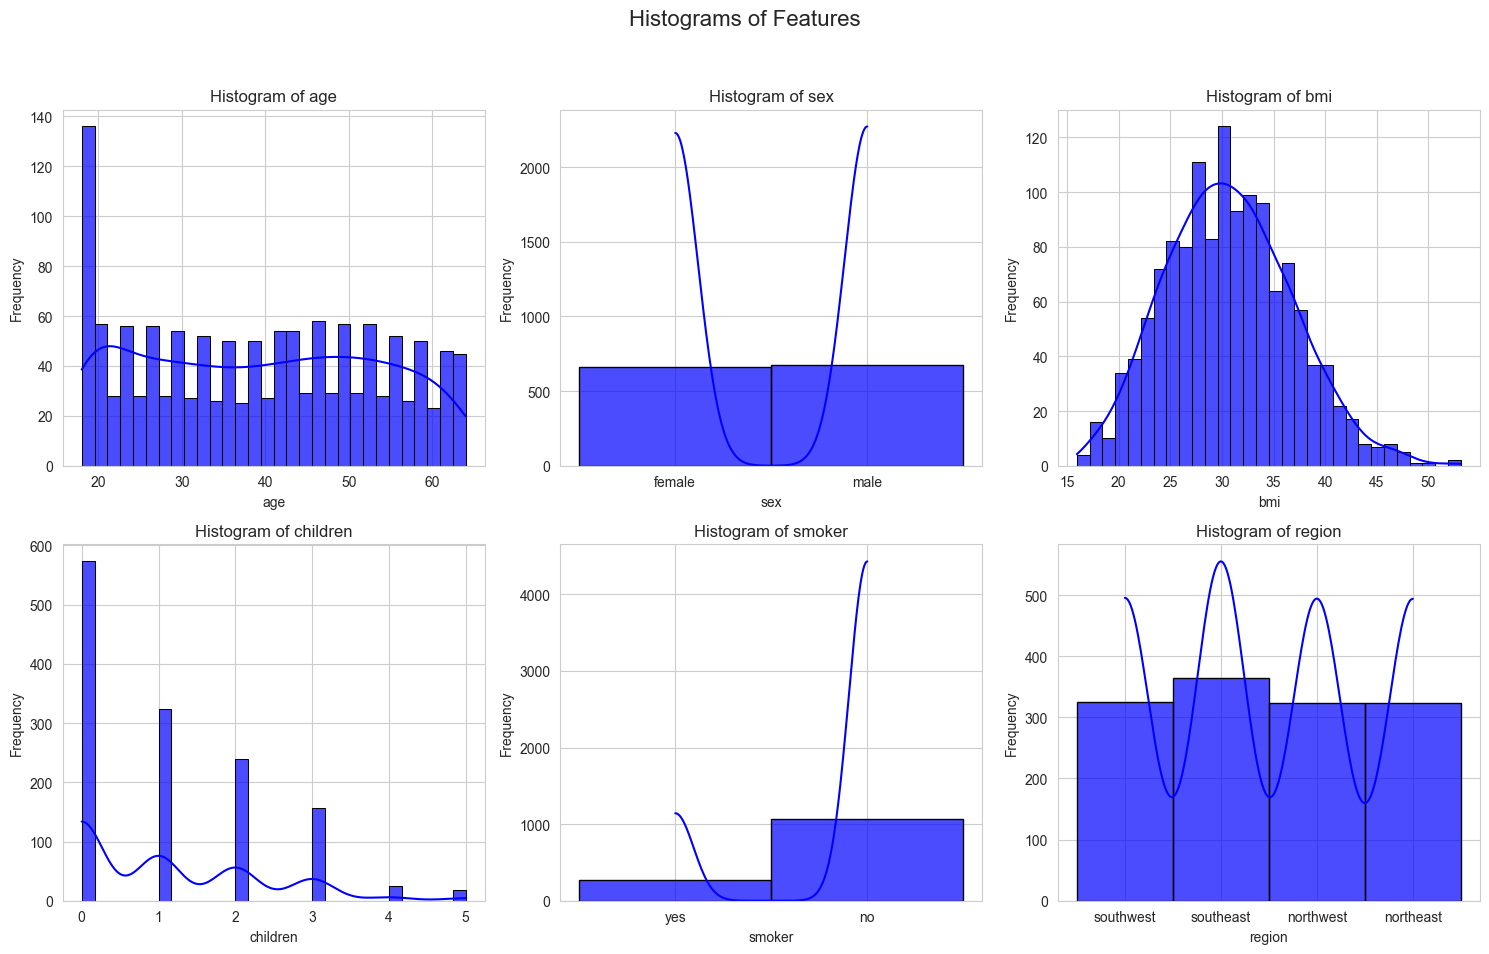

In [404]:
x = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
sns.set_style("whitegrid")

num_bins = 30
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms of Features', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data = health_insurance_df[x[i]], bins=num_bins, ax=ax, kde=True, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title('Histogram of ' + x[i], fontsize=12)
    ax.set_xlabel(x[i], fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("histograms.pdf", format='pdf')
plt.show()

###  In preparation for running various regression models, it's important to encode categorical features with integers and reassign the DataFrame for x and y. X denotes the feature variables, while y represents the numerical charges. The categorical features include sex, smoker, and region.

In [405]:
# Silence warnings!

pd.set_option('future.no_silent_downcasting', True)

sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

health_insurance_df.loc[:, ['sex']] = health_insurance_df.loc[:, ['sex']].replace(sex_mapping).astype(int)
health_insurance_df.loc[:, ['smoker']] = health_insurance_df.loc[:, ['smoker']].replace(smoker_mapping).astype(int)
health_insurance_df.loc[:, ['region']] = health_insurance_df.loc[:, ['region']].replace(region_mapping).astype(int)

X = health_insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y = health_insurance_df['charges'].values

### A preview of the DF now

In [406]:
health_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [407]:
print(f'\nFeatures:\n\n{X}')
print(f'\nIndividual Charges:\n\n{y}')


Features:

[[19 1 27.9 0 1 1]
 [18 0 33.77 1 0 2]
 [28 0 33.0 3 0 2]
 ...
 [18 1 36.85 0 0 2]
 [21 1 25.8 0 0 1]
 [61 1 29.07 0 1 3]]

Individual Charges:

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Scaling the data before running models

In [408]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Features after scaling:\n\n{X}')

Features after scaling:

[[-1.44041773  1.00977099 -0.45315959 -0.90923416  1.96966039 -1.34316271]
 [-1.51164747 -0.99032355  0.50942165 -0.07944162 -0.50770174 -0.43801727]
 [-0.79935006 -0.99032355  0.3831546   1.58014347 -0.50770174 -0.43801727]
 ...
 [-1.51164747  1.00977099  1.01448983 -0.90923416 -0.50770174 -0.43801727]
 [-1.29795825  1.00977099 -0.79752426 -0.90923416 -0.50770174 -1.34316271]
 [ 1.55123139  1.00977099 -0.26129928 -0.90923416  1.96966039  0.46712816]]


## PCA

### Reducing dimensionality by using 2 features in PCA. There are 2 steps to this:

### 1. Creating a DataFrame with PCA results for visualization.

### 2. Plotting the data in reduced-dimensional space. 

In [409]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1','PC2'])

## appending charges to the Dataframe

pca_df['Charges'] = y

# plotting the data
 
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Charges'], cmap='viridis', alpha=0.8)
plt.title('PCA of Features with Charges as Color')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Charges')
plt.show()

## Looking at the results above, predictions will be possible as the data is grouped closely together.

### It's important to note that PC2 is significant as charges increase with PC2 

## Linear Regression

In [410]:
linear_reg = LinearRegression()

## Now doing cross validation with linear regression 
linear_cross_val_score = cross_val_score(linear_reg, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'The result of the cross validation scoring for Linear Regression:\n\n{linear_cross_val_score}')

The result of the cross validation scoring for Linear Regression:

[0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ]


### Calculating the R^2 with above. I hope to achieve a R^2 close to 1.  

In [411]:
linear_reg_rsq = linear_cross_val_score.mean()
print(f'Cross validation score (R-squared):\n\n{linear_reg_rsq}')

Cross validation score (R-squared):

0.7471285330088385


## K-Nearest Neighbors (KNN) Algorithm

### Trying out KNN regressor and then cross validating to find the best number of neighbors and best weight. The first plot is when weights = "uniform" and the second is when weights = "distance"

Min Mean Squared Error: 26507076.164269555
Best k: 9


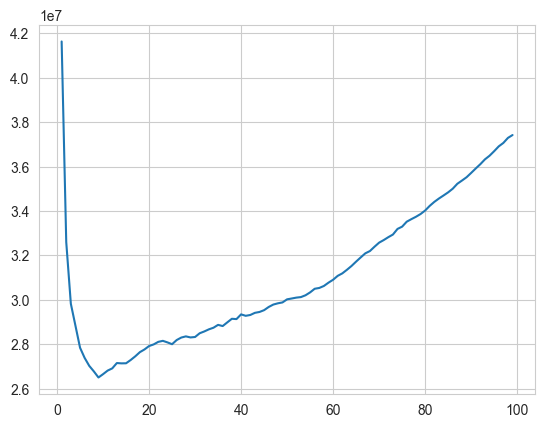

In [412]:
# 1st plot 

knn_score = []
weights = "uniform"
n_k = np.arange(1,100)
for k in n_k:
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
    scores = cross_validate(knn_reg, X, y, cv=10, scoring = ('neg_mean_squared_error', 'r2'))
    knn_score.append(-scores['test_neg_mean_squared_error'].mean()) 

plt.plot(n_k, knn_score)
print("Min Mean Squared Error:", np.min(knn_score))
print("Best k:", n_k[np.argmin(knn_score)])

Min Mean Squared Error: 26592340.61212997
Best k: 12


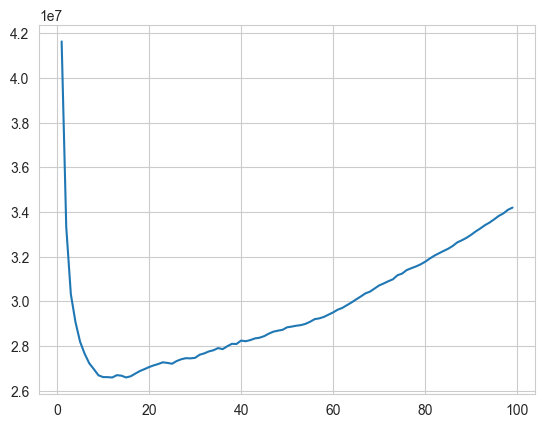

In [413]:
# 2nd plot 

knn_score2 = []
weights = "distance"
n_k= np.arange(1,100)
for k in n_k:
    knn_reg2 = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
    scores2 = cross_validate(knn_reg2, X, y, cv=10, scoring = ('neg_mean_squared_error', 'r2'))
    knn_score2.append(-scores2['test_neg_mean_squared_error'].mean()) 

plt.plot(n_k, knn_score2)
print("Min Mean Squared Error:", np.min(knn_score2))
print("Best k:", n_k[np.argmin(knn_score2)])

### The graphs above reveal that the best number of neighbors = 9 and when the weights are 'uniform'.

### To proceed, cross validate the model with the best k and weights on the dataset. This allows to compute the mean R^2. 

In [414]:
### cross validation scores for above 
knn_reg_test = KNeighborsRegressor(n_neighbors=9, weights="uniform")
knn_cross_val_score = cross_val_score(knn_reg_test, X, y, cv=5, scoring=make_scorer(r2_score))
knn_reg_rsq = knn_cross_val_score.mean()
print(f'The cross validation score of KNN regression is:\n\n{knn_reg_rsq}')

The cross validation score of KNN regression is:

0.8156641259699701


## Decision Tree & Random Forest Models 

### The next two models are Decision Tree and Random Forest. It's important to find the best max depth for each model. This can be achieved by plotting the accuracies of both models at different depths and summarizing them by displaying in an array.

In [415]:
# decision tree score 

dt_score = []

# random forest score 

rf_score = []

n_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

for k in n_k:
    
    # decision tree
    # lets use mse for mean squared error 
    dt_reg = DecisionTreeRegressor(criterion="squared_error", max_depth=k)
    dt_cross_val_scores = cross_val_score(dt_reg, X, y, cv=5, scoring=make_scorer(r2_score))
    dt_score.append(np.mean(dt_cross_val_scores))
    
    # random forest 
    rf_reg = RandomForestRegressor(criterion="squared_error", max_depth=k)
    rf_cross_val_scores = cross_val_score(rf_reg, X, y, cv=5, scoring=make_scorer(r2_score))
    rf_score.append(np.mean(rf_cross_val_scores))

## printing the average scores 

print(f'The average cross validation scores for Decision Tree are:\n\n{dt_score}')
print(f'\n\nThe average cross validation scores for Random Forest are:\n\n{rf_score}')

The average cross validation scores for Decision Tree are:

[0.6178104204997692, 0.8193469617944815, 0.8425321875167431, 0.8490710211847972, 0.843503956305601, 0.8290527264986409, 0.8178480916949151, 0.7902147300476716, 0.7628260050560265, 0.7561658024135092, 0.7189762691840733]


The average cross validation scores for Random Forest are:

[0.6178759627895658, 0.8264359087702381, 0.8525125729865526, 0.8580941599129819, 0.8574473159008704, 0.8540992047740851, 0.8501207476386032, 0.8475858840390205, 0.8427310079661657, 0.8385802916835093, 0.8373638616528318]


## Now lets plot!

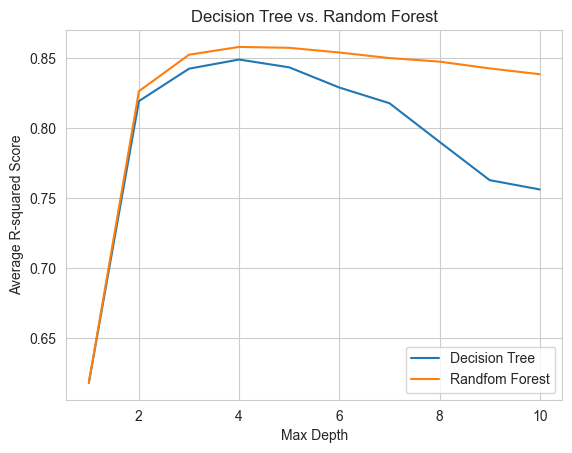

In [416]:
plt.plot(n_k, dt_score, label='Decision Tree')  
plt.plot(n_k, rf_score, label='Randfom Forest')  
plt.xlabel('Max Depth')
plt.ylabel('Average R-squared Score')
plt.title('Decision Tree vs. Random Forest')
plt.legend()
plt.show()

### Based on the scores and plotted graphs above, the highest accuracy comes with the Random Forest regressor with a max depth of 3.

### Now lets cross validate the model given these condition!

In [417]:
rf_reg_test = RandomForestRegressor(criterion="squared_error", max_depth=3)
rf_regtest_cross_val_score = cross_val_score(rf_reg_test, X, y, cv=5, scoring=make_scorer(r2_score))
rf_reg_test_rsq = rf_regtest_cross_val_score.mean()
print(f'The cross validation score of Random Forest is: {rf_reg_test_rsq}')

The cross validation score of Random Forest is: 0.8528165174716023


## Lets test using a final model: Neural Network.

### The final model is MLP regressor.

### The solver for this model is 'adam'.

### "Adam" refers to a popular optimization algorithm commonly used to train neural networks, including MLP regressors. Adam stands for Adaptive Moment Estimation and is known for its efficiency in optimizing the learning process by adjusting the learning rates of individual parameters. In essence, 'adam' helps the MLP regressor converge faster and more reliably to a solution during training.

### Once again after setting up the regressor, I cross validate and display the mean R^2. 

In [418]:
neural_network_reg = MLPRegressor(
    hidden_layer_sizes=(20,),
    max_iter=250,
    alpha=1e-4,
    solver="adam",
    verbose=10,
    random_state=1,
    learning_rate_init=0.5,
)
neural_network_test_cross_val_score = cross_val_score(neural_network_reg, X, y, cv=5, scoring=make_scorer(r2_score))

Iteration 1, loss = 158605339.06686544
Iteration 2, loss = 153484120.11834055
Iteration 3, loss = 138929033.19122392
Iteration 4, loss = 115106255.98380907
Iteration 5, loss = 83823094.79212846
Iteration 6, loss = 52374475.28562033
Iteration 7, loss = 31151401.65383846
Iteration 8, loss = 22743925.10954056
Iteration 9, loss = 20976052.08041551
Iteration 10, loss = 19858756.04174110
Iteration 11, loss = 18338700.22219017
Iteration 12, loss = 17762989.09217308
Iteration 13, loss = 17530317.54119593
Iteration 14, loss = 17279159.70747698
Iteration 15, loss = 17008339.01000389
Iteration 16, loss = 16839984.99865955
Iteration 17, loss = 16725295.70571485
Iteration 18, loss = 16644056.48945883
Iteration 19, loss = 16567935.68444796
Iteration 20, loss = 16492656.52593803
Iteration 21, loss = 16419277.19061597
Iteration 22, loss = 16372320.57630438
Iteration 23, loss = 16288822.06071159
Iteration 24, loss = 16227061.90920492
Iteration 25, loss = 16171426.09208117
Iteration 26, loss = 16113618.

In [419]:
neural_network_reg_test = neural_network_test_cross_val_score.mean()
print(f'The mean R^2 using this MLP regressor is:\n\n{neural_network_reg_test}')

The mean R^2 using this MLP regressor is:

0.834490843395226


## Comparing the mean R^2 of Random Forest and Neural Network we can see that Random Forest yields a better R^2.

In [420]:
print(f' The R^2 for MLP regressor was {neural_network_reg_test} vs. {rf_reg_test_rsq} for Random Forest')

 The R^2 for MLP regressor was 0.834490843395226 vs. 0.8528165174716023 for Random Forest


# Predictions

## Lets see if we can make predictions on new unseen data using the 'best' model!

### I defined a new variable called 'prediction_data_point'. This var takes in values to simulate a new record in the database and then make a prediction for the insurance charge based on the value of the features. 

### For example, in the simulation below, the data point used below corresponds with a 30-year old female with a BMI of 25.0 that smokes and has 2 children living in the Northeast. 

In [421]:
## using Random Forest with best depth = 3

rf_reg_test.fit(X, y)
prediction_data_point = np.array([[30, 1, 25.0, 2, 1, 4]])
rf_reg_prediction = rf_reg_test.predict(prediction_data_point)
print(f'The insurance charge prediction is:\n\n{rf_reg_prediction}')

The insurance charge prediction is:

[45544.26737077]


### Does the above insurance charge make sense? It makes sense for insurance companies to charge higher insurance for smokers considering the negative health impacts that come with smoking!

## Based on this description of an generated person, the model predicts that this individual owes $45716.34 in insurance charges.

## Some additional visualization!

### Using the most effective model, I can create additional visualizations to showcase effectiveness across different values. Lets start by splitting the model into the training and testing sets. 

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### After splitting the model into training and testing, I plot the true values of the y variable (insurance charges) on the x axis, and compare it to the model's predicted values, which are plotted on the y axis.

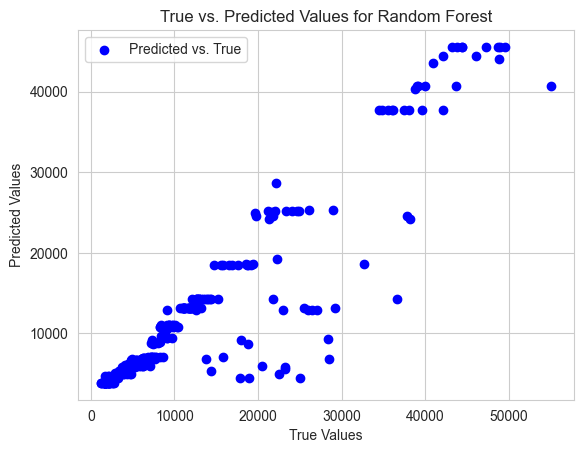

In [423]:
y_pred = rf_reg_test.predict(X_test)
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Random Forest')
plt.legend()
plt.show()

### Based on the above graph, I can see that the model is extremely accurate in predicting small values, not as accurate in predicting intermediate values, and fairly accurate in predicting large values.

# Plotting the features of importance

age 0.10861644366257668
sex 0.0
bmi 0.1678342853871843
children 0.00286167317504052
smoker 0.7206875977751984
region 0.0


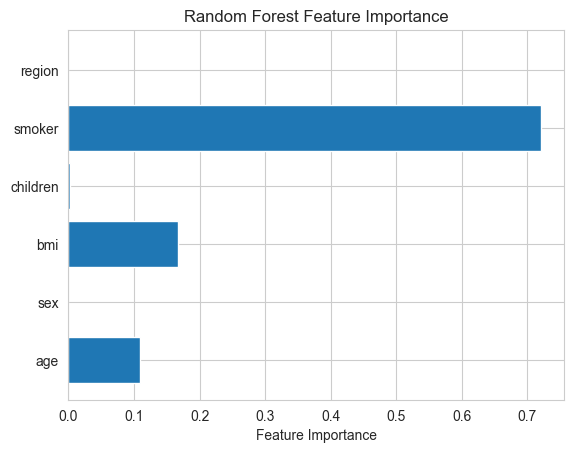

In [424]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

rf_feature_importances = rf_reg_test.feature_importances_

for i in range(len(feature_names)):
    print(feature_names[i], rf_feature_importances[i])

plt.barh(feature_names, rf_feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## The above feature importance graph explains why predictions change drastically for insurance charges when indicating if a person is a smoker or not!

### The most important features for an individual when trying to predict insurance charges are whether or not they're a smoker, their bmi, and their age.

# Ensemble Model

In [425]:
linear_reg.fit(X_train, y_train)
knn_reg_test.fit(X_train, y_train)
rf_reg_test.fit(X_train, y_train)
neural_network_reg.fit(X_train, y_train)

linear_reg_predict = linear_reg.predict(X_test)
knn_reg_predict = knn_reg_test.predict(X_test)
rf_reg_predict = rf_reg_test.predict(X_test)
neural_network_predict = neural_network_reg.predict(X_test)

y_pred_ensemble = ((linear_reg_predict + knn_reg_predict + rf_reg_predict + neural_network_predict) / 4)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("R-squared for Ensemble Model:", r2_ensemble)

Iteration 1, loss = 160368471.23026183
Iteration 2, loss = 154873015.29006138
Iteration 3, loss = 139639857.46132305
Iteration 4, loss = 114300706.32448582
Iteration 5, loss = 81139078.94434252
Iteration 6, loss = 50487719.40598058
Iteration 7, loss = 30119805.30324016
Iteration 8, loss = 22052231.18696297
Iteration 9, loss = 20100239.83018591
Iteration 10, loss = 18608514.58616044
Iteration 11, loss = 17846199.65679020
Iteration 12, loss = 17316227.07256676
Iteration 13, loss = 16864342.56413715
Iteration 14, loss = 16555383.21015730
Iteration 15, loss = 16478586.11583122
Iteration 16, loss = 16354135.17709896
Iteration 17, loss = 16223792.35888348
Iteration 18, loss = 16104091.86737156
Iteration 19, loss = 16031549.09401664
Iteration 20, loss = 15968410.14096247
Iteration 21, loss = 15836033.83828250
Iteration 22, loss = 15757445.40986504
Iteration 23, loss = 15645437.54066768
Iteration 24, loss = 15579208.44559684
Iteration 25, loss = 15485952.69382918
Iteration 26, loss = 15372924.

In [426]:
print(f'The R^2 of the Ensemble Method is:\n\n{r2_ensemble}\n\nThis is better than the R^2 for the Random Forest Regressor which was:\n\n{rf_reg_test_rsq}')

The R^2 of the Ensemble Method is:

0.8235983687070515

This is better than the R^2 for the Random Forest Regressor which was:

0.8528165174716023


## Additional Ensemble Method 

### Here is an additional Ensemble method I found online and wanted to try

In [427]:
additional_ensemble_method = VotingRegressor([
    ('Linear', linear_reg),
    ('KNN', knn_reg_test),
    ('RF', rf_reg_test),
    ('NN', neural_network_reg)
])

additional_ensemble_method.fit(X_train, y_train)
ensemble_predictions = additional_ensemble_method.predict(X_test)
ensemble_r2 = r2_score(y_test, ensemble_predictions)
print("Ensemble Model R-squared:", ensemble_r2)

Iteration 1, loss = 160368471.23026183
Iteration 2, loss = 154873015.29006138
Iteration 3, loss = 139639857.46132305
Iteration 4, loss = 114300706.32448582
Iteration 5, loss = 81139078.94434252
Iteration 6, loss = 50487719.40598058
Iteration 7, loss = 30119805.30324016
Iteration 8, loss = 22052231.18696297
Iteration 9, loss = 20100239.83018591
Iteration 10, loss = 18608514.58616044
Iteration 11, loss = 17846199.65679020
Iteration 12, loss = 17316227.07256676
Iteration 13, loss = 16864342.56413715
Iteration 14, loss = 16555383.21015730
Iteration 15, loss = 16478586.11583122
Iteration 16, loss = 16354135.17709896
Iteration 17, loss = 16223792.35888348
Iteration 18, loss = 16104091.86737156
Iteration 19, loss = 16031549.09401664
Iteration 20, loss = 15968410.14096247
Iteration 21, loss = 15836033.83828250
Iteration 22, loss = 15757445.40986504
Iteration 23, loss = 15645437.54066768
Iteration 24, loss = 15579208.44559684
Iteration 25, loss = 15485952.69382918
Iteration 26, loss = 15372924.

In [428]:
print(f'The R^2 for the additional ensemble method is:\n\n{ensemble_r2}\n\nThe R^2 for the best Random Forest Regressor was:\n\n{rf_reg_test_rsq}')

The R^2 for the additional ensemble method is:

0.8236894406421548

The R^2 for the best Random Forest Regressor was:

0.8528165174716023


## Conclusion

### This project implements various regression models to predict insurance charges for individuals. This includes Linear Regression, KNeighborsRegressor (KNN), DecisionTreeRegressor, RandomForestRegressor, MLPRegressor, and VotingRegressor. Each model is cross-validated 5 times on the dataset and the relevant metric of R-squared is calculated for each model.

### The findings demonstrate that VotingRegressor and MLPRegressor were the most accurate models. The preprocessing steps, feature exploration, dimensionality reduction, and application of various regression models helped when trying to make charge insurance predictions on a new unseen datapoint (individual).